In [1]:
from IPython.display import Image

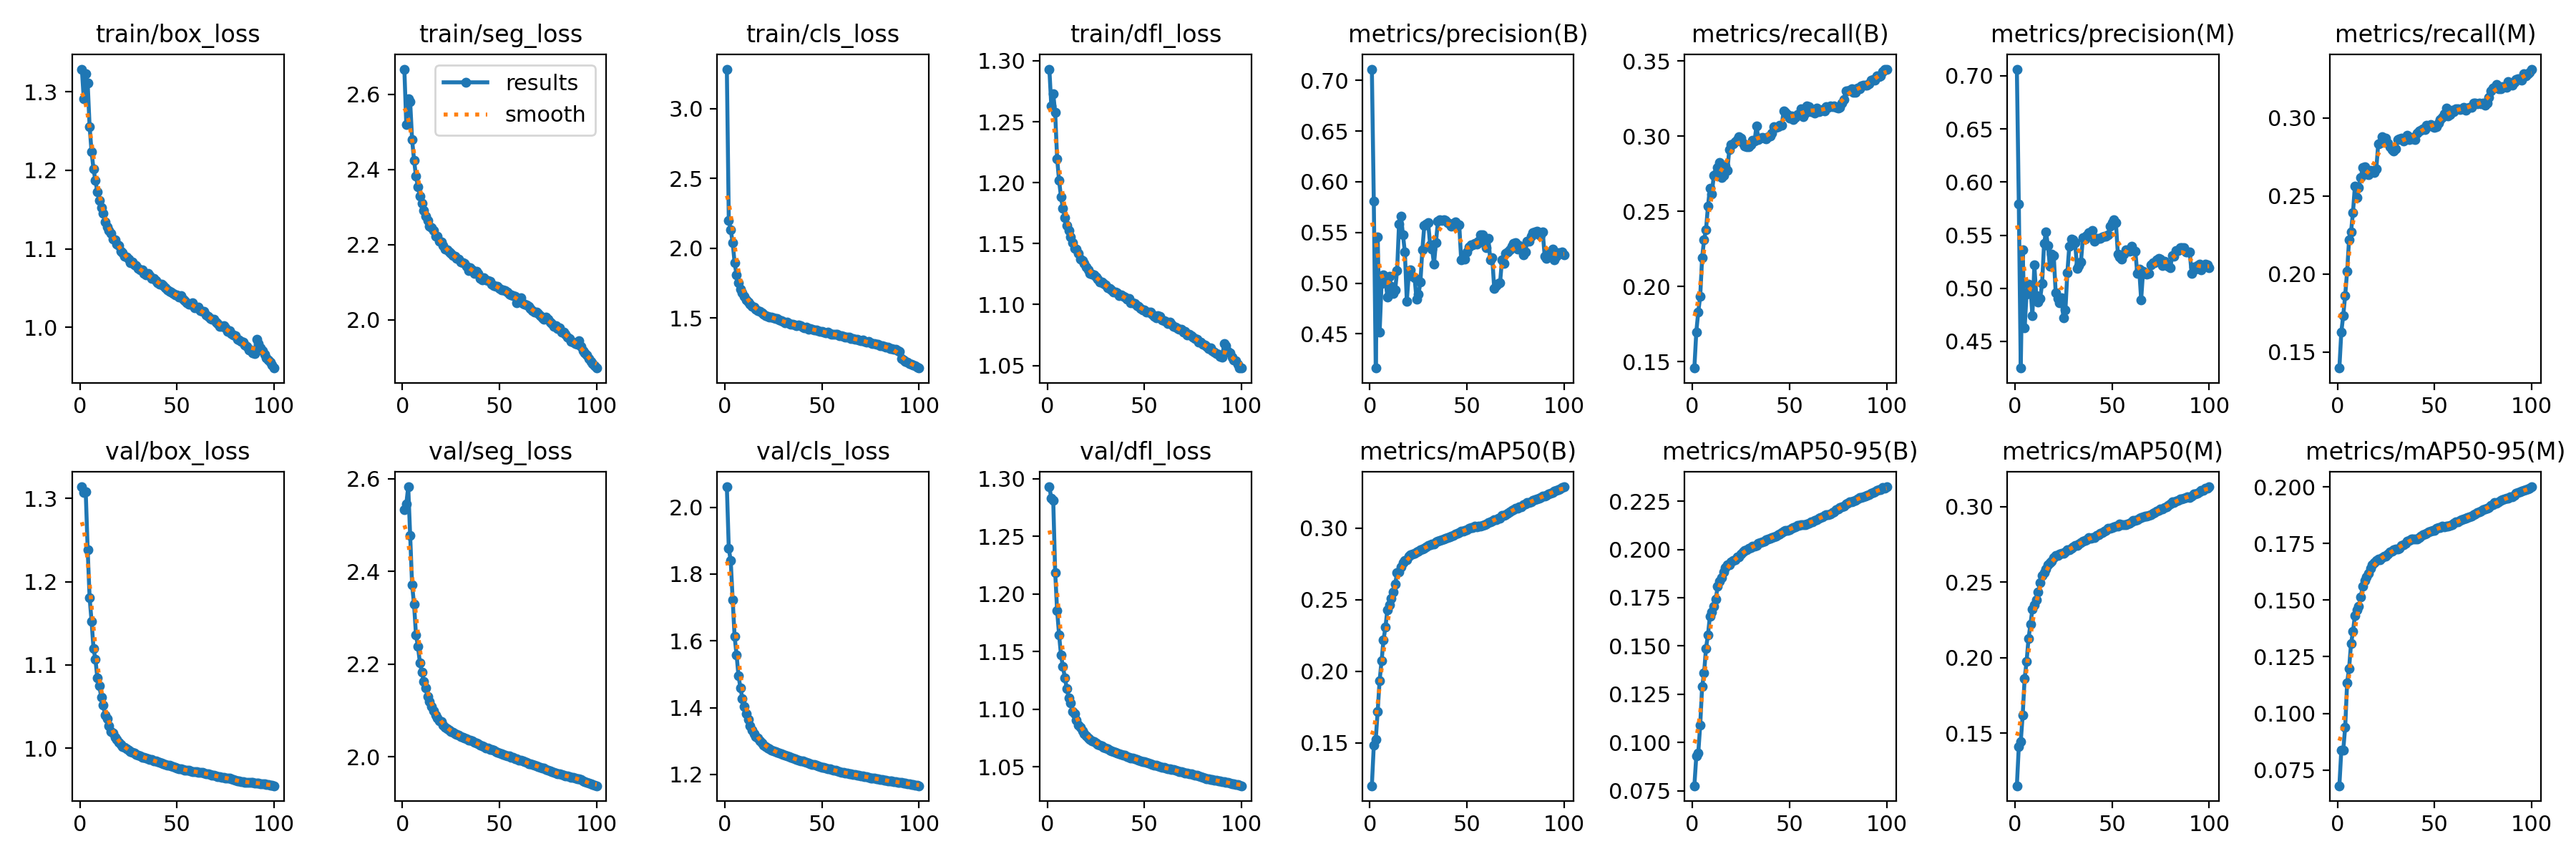

In [2]:
Image("runs/segment/train/results.png", width=600)


image 1/1 /media/sergio/University/Master/Bloque3/ARF/Cloth_Segmenter/yolo_segmenter/example.jpg: 512x320 1 pants, 5 belts, 2 shoes, 2 sleeves, 80.2ms
Speed: 5.2ms preprocess, 80.2ms inference, 200.1ms postprocess per image at shape (1, 3, 512, 320)
Results saved to runs/segment/predict3


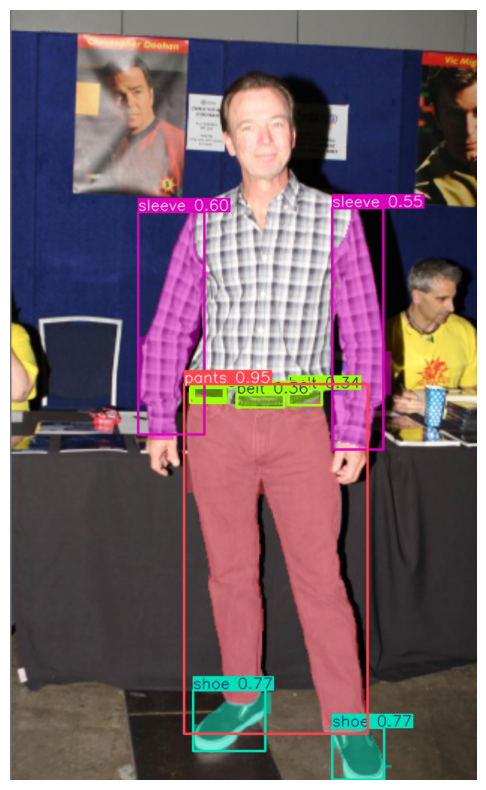

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# Load a model
model_path = "../weights/best.pt"
model = YOLO(model_path)

# Perform object detection on an image
results = model("example.jpg", save=True)
# Get the rendered image (with annotations)
rendered_image = results[0].plot()  # returns a numpy array (BGR format)

# Convert BGR to RGB for correct colors in matplotlib
rendered_image_rgb = cv2.cvtColor(rendered_image, cv2.COLOR_BGR2RGB)

# Show in notebook
plt.figure(figsize=(10, 10))
plt.imshow(rendered_image_rgb)
plt.axis('off')
plt.show()

In [5]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'shirt, blouse', 1: 'top, t-shirt, sweatshirt', 2: 'sweater', 3: 'cardigan', 4: 'jacket', 5: 'vest', 6: 'pants', 7: 'shorts', 8: 'skirt', 9: 'coat', 10: 'dress', 11: 'jumpsuit', 12: 'cape', 13: 'glasses', 14: 'hat', 15: 'headband, head covering, hair accessory', 16: 'tie', 17: 'glove', 18: 'watch', 19: 'belt', 20: 'leg warmer', 21: 'tights, stockings', 22: 'sock', 23: 'shoe', 24: 'bag, wallet', 25: 'scarf', 26: 'umbrella', 27: 'hood', 28: 'collar', 29: 'lapel', 30: 'epaulette', 31: 'sleeve', 32: 'pocket', 33: 'neckline', 34: 'buckle', 35: 'zipper', 36: 'applique', 37: 'bead', 38: 'bow', 39: 'flower', 40: 'fringe', 41: 'ribbon', 42: 'rivet', 43: 'ruffle', 44: 'sequin', 45: 'tassel'}
 obb: None
 orig_img: array([[[134, 138, 139],
         [134, 138, 139],
         [134, 138, 139],
         ...,
         

In [4]:
from ultralytics import YOLO
import cv2
import numpy as np
import os
from PIL import Image

# Load model
model = YOLO("runs/segment/train/weights/best.pt")

# Load image
image_path = "example.jpg"
results = model(image_path)

# Original image
original = cv2.imread(image_path)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
orig_h, orig_w = original.shape[:2]

# Output directory
output_dir = "segmented_objects"
os.makedirs(output_dir, exist_ok=True)

# Process results
for i, result in enumerate(results):
    masks = result.masks.data.cpu().numpy()  # (N, H, W) - binary masks per object
    print(f"Found {len(masks)} objects")

    for j, mask in enumerate(masks):
        # Resize mask to original image size
        mask_resized = cv2.resize(mask, (orig_w, orig_h), interpolation=cv2.INTER_NEAREST)
        mask_uint8 = (mask_resized * 255).astype(np.uint8)

        # Create RGBA image
        masked_image = np.zeros((orig_h, orig_w, 4), dtype=np.uint8)
        for c in range(3):  # RGB
            masked_image[:, :, c] = original[:, :, c] * (mask_resized.astype(np.uint8))
        masked_image[:, :, 3] = mask_uint8  # Alpha channel

        # Convert to PIL for saving
        pil_image = Image.fromarray(masked_image)

        # Optional: crop to mask bbox
        bbox = Image.fromarray(mask_uint8).getbbox()
        if bbox:
            pil_image = pil_image.crop(bbox)

        # Save to file
        save_path = os.path.join(output_dir, f"object_{i}_{j}.png")
        pil_image.save(save_path)
        print(f"Saved: {save_path}")



image 1/1 /media/sergio/University/Master/Bloque3/ARF/Cloth_Segmenter/yolo_segmenter/example.jpg: 512x320 1 pants, 5 belts, 2 shoes, 2 sleeves, 75.3ms
Speed: 2.4ms preprocess, 75.3ms inference, 8.8ms postprocess per image at shape (1, 3, 512, 320)
Found 10 objects
Saved: segmented_objects/object_0_0.png
Saved: segmented_objects/object_0_1.png
Saved: segmented_objects/object_0_2.png
Saved: segmented_objects/object_0_3.png
Saved: segmented_objects/object_0_4.png
Saved: segmented_objects/object_0_5.png
Saved: segmented_objects/object_0_6.png
Saved: segmented_objects/object_0_7.png
Saved: segmented_objects/object_0_8.png
Saved: segmented_objects/object_0_9.png
